<h1>Course Week Projects 4</h1>

<h2>Introduction/Business Problem</h2>

<p>The objective of this project is to help the management of Banjul Pizza Ltd. The firm is considering the possibility of opening Pizza restaurants in Toronto Canada. The initial research shows that Toronto is ethnically diverse with people from different background who loves pizza. The management want to find out the best possible place to open their first pizza restaurant. As one of the largest cities in Canada, with immigrant cultures, Toronto is a business-minded city which already have many pizza restaurants. Therefore, the aim is to open the first restaurant in a neighborhood with lesser pizza restaurants thereby a possible lesser competition too.

As a member of the project team and data science professional, I have been tasked to offer solution to the problem of opening the first restaurant in the right place with less potential competition in the city of Toronto.</p>

<h2>Data Sources and discussion</h2

<p>This project will make use of data from sources to offer a data driven solution. Therefore, we will focus on data collection that are relevant to Toronto. For instance, we will need to know all the borough in Toronto with related neighborhoods and post code. We all need to geo location data such as longitude and latitude of each place too. The source below will offer data needed for the analysis:
<ul>
<li>Wikipedia - There is a special page on the Wikipedia that has data about borough, neighborhood and postal code of Toronto.</li>
<li>Toronto Geospace information – Initial review shows that Wikipedia data does not contain information about longitude and latitude. Therefore, we will use downloaded CVS file that already has the geo data for all neighborhoods in Toronto.</li>
<li>Foursquare location data– Now we data about the surrounding venues near each location. We will use the Foursqure API tool to collect venues that are nearby each geo location.</li>
</ul>
These three sources will supply us with data that will be transform and explore using relevant data science methodologies.</p>


In [73]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h3>Import data from Wikipedia</h3>


In [52]:
import pandas as pd
from pandas import DataFrame

#!pip install beautifulsoup4
#!pip install lxml
from bs4 import BeautifulSoup
import requests

source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighborhood
M1A,Not assigned,
M2A,Not assigned,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [53]:
#insert data into datafram of Pandas
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [23]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']


In [54]:
# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)


In [55]:
# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned',df2['Borough'], df2['Neighborhood'])

df2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [56]:
df2.shape

(103, 3)

<h3>Get the Geo location of Postal codes in Toronto </h3>

In [59]:
# I will use the csv file from http://cocl.us/Geospatial_data 
# Read the csv file, put it in a DataFrame
# Then merge both DataFrames
geo = pd.read_csv('https://cocl.us/Geospatial_data')
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<h3> Merge the two tables into one, that is the Goe location and Borough data</h3>

In [65]:
# The data obtained from the CSV has 3 colums. But let us first rename one column before merging.
# 'Postal Code' column to 'Postalcode'
geo.rename(columns={'Postcode':'Postal Code'},inplace=True)
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [68]:
# Now merging both DataFrames
torontodata = pd.merge(df2,geo,on='Postal Code')
torontodata.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<h3> Let us check how many boroughs and how many neighborhoods we have in Toronto</h3>


In [70]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(torontodata['Borough'].unique()),
        torontodata.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [123]:
#toronto = df3[df3['Borough'].str.contains('Toronto',regex=False)]
#toronto.head()

<h3> Let's get the geographical coordinates of Toronto</h3>

In [76]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


<h3> We can now present the map of Toronto</h3>

In [125]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(torontodata['Latitude'], torontodata['Longitude'], torontodata['Borough'], torontodata['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h3> Setup Foursquare credentials and version details<h3>

In [79]:
CLIENT_ID = 'KQPINHWUIC3AYI2ULQYNILDA1HBF3STFRAY23EVWS0YWC2P5' # your Foursquare ID
CLIENT_SECRET = 'QWBUX1J0TOTIWGKFIJKNCMIX5FNFFBR0QIG4034N5QH4E11Z' # your Foursquare Secret
VERSION = '20200527'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KQPINHWUIC3AYI2ULQYNILDA1HBF3STFRAY23EVWS0YWC2P5
CLIENT_SECRET:QWBUX1J0TOTIWGKFIJKNCMIX5FNFFBR0QIG4034N5QH4E11Z


<h3>Now, let's get the top 100 venues within a radius of 1000 meters.</h3>

In [80]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KQPINHWUIC3AYI2ULQYNILDA1HBF3STFRAY23EVWS0YWC2P5&client_secret=QWBUX1J0TOTIWGKFIJKNCMIX5FNFFBR0QIG4034N5QH4E11Z&v=20200527&ll=43.6534817,-79.3839347&radius=1000&limit=100'

<h3>Send the GET request and examine the resutls. The output will be in JSON format</h3>

In [81]:
results = requests.get(url).json()

In [82]:
results

{'meta': {'code': 200, 'requestId': '5eceb719e826ac001b1a162b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 238,
  'suggestedBounds': {'ne': {'lat': 43.66248170900001,
    'lng': -79.37151886118865},
   'sw': {'lat': 43.64448169099999, 'lng': -79.39635053881135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
  

In [83]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [84]:
#Now we are ready to clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Indigo,Bookstore,43.653515,-79.380696
3,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
4,Textile Museum of Canada,Art Museum,43.654396,-79.386500


In [85]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<h2>Let's explore the Neighborhoods in Toronto</h2>

In [86]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [90]:
#Now lets create a new dataframe called toronto_venues using the above function getNearbyVenues.
toronto_venues = getNearbyVenues(names=torontodata['Neighborhood'],
                                   latitudes=torontodata['Latitude'],
                                   longitudes=torontodata['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [91]:
#let check the size and header of our new data
print(toronto_venues.shape)
toronto_venues.head()

(6928, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
3,Parkwoods,43.753259,-79.329656,LCBO,43.757774,-79.314257,Liquor Store
4,Parkwoods,43.753259,-79.329656,Tim Hortons,43.760668,-79.326368,Café


In [92]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,62,62,62,62,62,62
"Alderwood, Long Branch",49,49,49,49,49,49
"Bathurst Manor, Wilson Heights, Downsview North",42,42,42,42,42,42
Bayview Village,15,15,15,15,15,15
"Bedford Park, Lawrence Manor East",77,77,77,77,77,77
Berczy Park,100,100,100,100,100,100
"Birch Cliff, Cliffside West",14,14,14,14,14,14
"Brockton, Parkdale Village, Exhibition Place",100,100,100,100,100,100
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100


In [93]:
#How many unique categories can be curated from all the venues

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 345 uniques categories.


<h3> Now lets analyse the data collected on each neighbourhood</h3>

In [95]:
# one hot encoding using dummy variables
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(6928, 345)


,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,

In [96]:
#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Churrascaria,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,

In [97]:
#let get the top three of each
num_top_venues = 3

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.18
1           Coffee Shop  0.05
2  Caribbean Restaurant  0.03


----Alderwood, Long Branch----
          venue  freq
0          Park  0.06
1  Burger Joint  0.04
2      Pharmacy  0.04


----Bathurst Manor, Wilson Heights, Downsview North----
         venue  freq
0         Park  0.12
1  Coffee Shop  0.10
2  Pizza Place  0.07


----Bayview Village----
                 venue  freq
0                 Park  0.13
1                 Bank  0.13
2  Japanese Restaurant  0.13


----Bedford Park, Lawrence Manor East----
                venue  freq
0              Bakery  0.09
1  Italian Restaurant  0.08
2    Sushi Restaurant  0.06


----Berczy Park----
                venue  freq
0         Coffee Shop  0.12
1                Café  0.05
2  Italian Restaurant  0.04


----Birch Cliff, Cliffside West----
                    venue  freq
0                    Park  0.14
1  Furniture / Home Store  0.07
2             Golf Course  0.07



                venue  freq
0                Park  0.12
1  Italian Restaurant  0.05
2                Café  0.05


----Runnymede, The Junction North----
            venue  freq
0     Coffee Shop  0.12
1      Beer Store  0.04
2  Sandwich Place  0.04


----Scarborough Village----
            venue  freq
0        Pharmacy  0.12
1  Sandwich Place  0.12
2     Coffee Shop  0.06


----South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens----
                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.12
2         Grocery Store  0.09


----St. James Town----
         venue  freq
0  Coffee Shop  0.13
1         Café  0.05
2   Restaurant  0.04


----St. James Town, Cabbagetown----
    venue  freq
0    Café  0.06
1    Park  0.05
2  Bakery  0.04


----Steeles West, L'Amoreaux West----
                venue  freq
0  Chinese Restaurant  0.13
1              Bakery  0.08
2         Coffee Shop  0.08


----Stn A PO Boxes---

In [98]:
#Let's put that into a pandas dataframe first lets sort the venues in descending order using a function.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [99]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Breakfast Spot,Cantonese Restaurant,Caribbean Restaurant,Bakery,Gym / Fitness Center,Shopping Mall,Hong Kong Restaurant,Sporting Goods Shop
1,"Alderwood, Long Branch",Park,Bank,Pizza Place,Toy / Game Store,Coffee Shop,Grocery Store,Discount Store,Clothing Store,Café,Pharmacy
2,"Bathurst Manor, Wilson Heights, Downsview North",Park,Coffee Shop,Pizza Place,Bank,Gas Station,Mediterranean Restaurant,Sushi Restaurant,Diner,Shopping Mall,Fried Chicken Joint
3,Bayview Village,Japanese Restaurant,Park,Trail,Gas Station,Bank,Café,Grocery Store,Chinese Restaurant,Intersection,Restaurant
4,"Bedford Park, Lawrence Manor East",Bakery,Italian Restaurant,Sushi Restaurant,Coffee Shop,Bagel Shop,Café,Restaurant,Asian Restaurant,Pub,Pizza Place


In [100]:
# Let extract places with Pizza in Toronto
toronto_Pizza = toronto_grouped[["Neighborhood","Pizza Place"]]
toronto_Pizza.head()

,Neighborhood,Pizza Place
0,Agincourt,0.016129
1,"Alderwood, Long Branch",0.040816
2,"Bathurst Manor, Wilson Heights, Downsview North",0.071429
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.025974


In [101]:
#which place has more pizza places
toronto_Pizza.max()

Neighborhood    York Mills, Silver Hills
Pizza Place                     0.121212
dtype: object

In [102]:

# Merge the Toronto Geodat and the Toronto Pizza data per Neighborhood
toronto_Pizza_merged = pd.merge(torontodata, toronto_Pizza, on='Neighborhood')

# Now, let's change the columns order
toronto_Pizza_merged = toronto_Pizza_merged.reindex(columns=['Postalcode','Borough','Neighborhood','Pizza Place','Latitude','Longitude'])

toronto_Pizza_merged.head()

,Postalcode,Borough,Neighborhood,Pizza Place,Latitude,Longitude
0,NaN,North York,Parkwoods,0.024390,43.753259,-79.329656
1,NaN,North York,Victoria Village,0.020833,43.725882,-79.315572
2,NaN,Downtown Toronto,"Regent Park, Harbourfront",0.000000,43.654260,-79.360636
3,NaN,North York,"Lawrence Manor, Lawrence Heights",0.010000,43.718518,-79.464763
4,NaN,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0.010000,43.662301,-79.389494


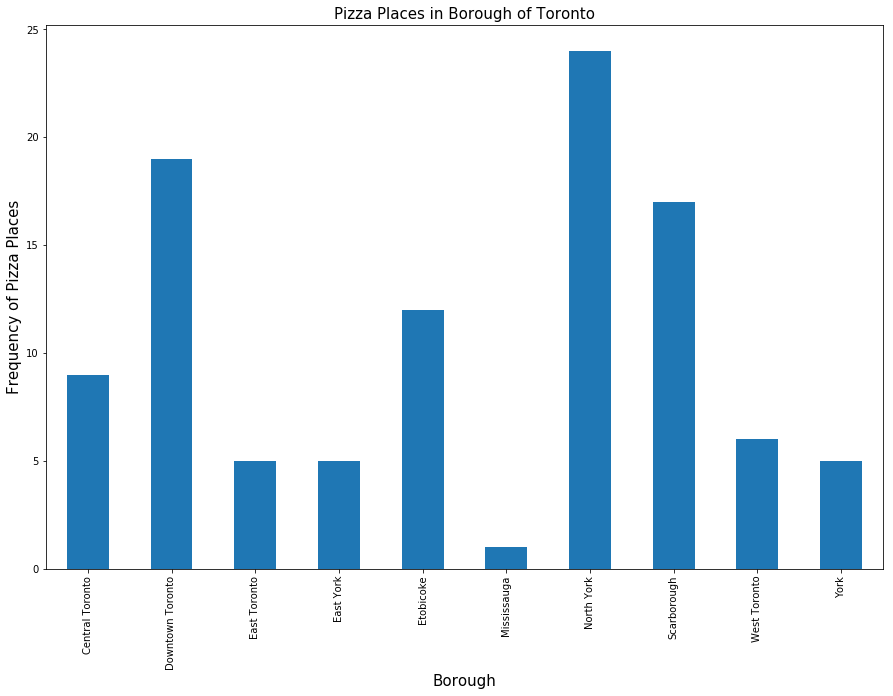

In [104]:
# Let's check how many Pizza we have per Borough

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,10))
plt.title('Pizza Places in Borough of Toronto', fontsize=15)
plt.xlabel("Borough", fontsize=15)
plt.ylabel ("Frequency of Pizza Places", fontsize=15)
toronto_Pizza_merged.groupby('Borough')['Pizza Place'].count().plot(kind='bar')
plt.show()

<h2>Let build Clustering Neighborhoods</h2>

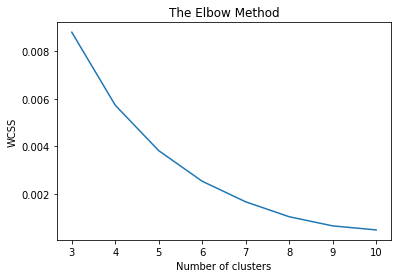

In [105]:
# Using the elbow method to find the optimal number of clusters
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

toronto_Pizza_Clustering = toronto_Pizza.drop('Neighborhood', 1)


wcss = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter= 50)
    kmeans.fit(toronto_Pizza_Clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [107]:

# set number of clusters
kclusters = 6

toronto_Pizza_Clustering = toronto_Pizza.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_Pizza_Clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 2, 4, 3, 1, 4, 1, 3, 3, 0, 4, 4, 1, 4, 1, 1, 0, 4, 0, 3, 2,
       3, 0, 0, 4, 0, 0, 1, 1, 3, 1, 3, 2, 2, 1, 1, 0, 0, 4, 0, 3, 4, 0,
       3, 2, 1, 1, 1, 3, 0, 3, 1, 1, 3, 0, 1, 0, 2, 2, 1, 2, 3, 1, 4, 1,
       1, 0, 4, 3, 3, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 1, 1, 1, 4, 1,
       0, 5, 1, 2, 1, 3, 2, 2, 2, 3, 1], dtype=int32)

In [109]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_Pizza_Clustering_merged = toronto_Pizza.copy()
# add clustering labels
toronto_Pizza_Clustering_merged["Cluster Labels"] = kmeans.labels_
toronto_Pizza_Clustering_merged.head()

,Neighborhood,Pizza Place,Cluster Labels
0,Agincourt,0.016129,1
1,"Alderwood, Long Branch",0.040816,3
2,"Bathurst Manor, Wilson Heights, Downsview North",0.071429,2
3,Bayview Village,0.000000,4
4,"Bedford Park, Lawrence Manor East",0.025974,3


In [111]:
# Now let's merge the Toronto Geodata and the Toronto Pizza Places data per Neighborhood with Cluster labels
toronto_Pizza_Clustering_merged2 = pd.merge(torontodata, toronto_Pizza_Clustering_merged[['Neighborhood','Pizza Place', 'Cluster Labels']], on='Neighborhood')

toronto_Pizza_Clustering_merged2.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Pizza Place,Cluster Labels
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.024390,3
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.020833,1
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.000000,4
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.010000,1
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.010000,1


In [112]:
# Let's sort the results by Cluster Labels
print(toronto_Pizza_Clustering_merged2.shape)
toronto_Pizza_Clustering_merged2.sort_values(["Cluster Labels"], inplace=True)
toronto_Pizza_Clustering_merged2

(103, 7)


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Pizza Place,Cluster Labels
51,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.713756,-79.490074,0.058824,0
40,M3K,North York,Downsview,43.737473,-79.464763,0.053571,0
43,M3N,North York,Downsview,43.761631,-79.520999,0.053571,0
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0.050000,0
44,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0.043478,0
35,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,0.048193,0
32,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.060606,0
52,M9L,North York,Humber Summit,43.756303,-79.565963,0.045455,0
53,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0.045455,0
55,M4M,East Toronto,Studio District,43.659526,-79.340923,0.050000,0


In [124]:
#Now, let's use the Folium Package to display the Neighborhoods by Cluste

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_Pizza_Clustering_merged2['Latitude'], toronto_Pizza_Clustering_merged2['Longitude'], toronto_Pizza_Clustering_merged2['Neighborhood'], toronto_Pizza_Clustering_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3> Let's group the results by summing the Cluster Labels</h3>

In [120]:
toronto_Pizza_Clustering_merged2.groupby(['Cluster Labels'])['Pizza Place'].agg('sum')

Cluster Labels
0    1.206009
1    0.467172
2    1.020216
3    0.656773
4    0.000000
5    0.121212
Name: Pizza Place, dtype: float64

<h2>CONCLUSION</h2>
<p>The management of firm wants to avoid heavy competition against existing Pizza. Therefore, they want to open their first Pizza restaurant in locations where there as less pizza restaurants. We can see from the K-Mean clustering results that Cluster 4 is the cluster which has less Pizza venues. I will then recommend cluster 4 as their first Pizza location. The firm should do further search about the areas that will also influence sales such as traffic, population, crime rate etc.</p>